# Script for making some small figures of Delta-wave and Omikron-wave for comparison

In [35]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

import os
import math

from datetime import date

saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [36]:
# Define paths
rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 

path_data = rootdir_data + "ssi_data\\"
path_dash = rootdir_data + "ssi_dashboard\\"
path_vacc = rootdir_data + "ssi_vacc\\"

path_figs = os.getcwd() +"\\..\\Figures\\" 

In [37]:
dfOmikron = pd.read_excel(rootdir_data+'Omikron.xlsx')

In [38]:
# dfOmikron
dfOmikron.Dato = pd.to_datetime(dfOmikron.Dato)
# dfOmikron = dfOmikron.iloc[1:] # Remove the first datapoint, since it has very few counts
# dfOmikron

In [39]:
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

df = pd.read_csv(latestdir+'\\Regionalt_DB\\24_reinfektioner_daglig_region.csv',delimiter=';',encoding='latin1')
df['Prøvedato'] =  pd.to_datetime(df['Prøvedato'],format='%Y-%m-%d')

# print(df.Region.unique())
# df = df[df.Region == 'Nordjylland']

dfTot = df.groupby('Prøvedato').sum()

# # dfCase = pd.read_csv(latestdir+'/Test_pos_over_time.csv',delimiter = ';',dtype=str)
# # dfCase = dfCase.iloc[:-2]
# # dfCase['NewPositive'] = pd.to_numeric(dfCase['NewPositive'].astype(str).apply(lambda x: x.replace('.','')))
# # dfCase['Tested'] = pd.to_numeric(dfCase['Tested'].astype(str).apply(lambda x: x.replace('.','')))
# # dfCase['PosPct'] = pd.to_numeric(dfCase['PosPct'].astype(str).apply(lambda x: x.replace(',','.')))
# # dfCase['Date'] =  pd.to_datetime(dfCase.Date,format='%Y-%m-%d')
# # testDates = dfCase['Date']

In [40]:
dfRe = df[df['Type af tilfælde (reinfektion eller første infektion)'] == '1.Reinfektion'].groupby('Prøvedato').sum()

In [41]:
dfOmikron

dfOmikronShort = dfOmikron.iloc[1:45]
dfOmikronShort
oDay = dfOmikronShort.Dato 
oRate = dfOmikronShort.Ratio/100

# Extend in both directions
preDay = np.arange(dfTot.index[0],oDay.iloc[0],np.timedelta64(1,'D'))
preRate = np.zeros(preDay.shape)

postDay = np.arange(oDay.iloc[-1],dfTot.index[-1],np.timedelta64(1,'D'))
postRate = np.ones(postDay.shape)

# Concatenate arrays
oDay = np.concatenate([preDay,oDay,postDay])
oRate = np.concatenate([preRate,oRate,postRate])

In [42]:
# Use a running mean on oRate 
# print(len(oRate))
# print(len(rnMean(oRate,7)))
oRate = np.concatenate([[0,0,0],rnMean(oRate,7),[1,1,1]])
# print(len(oRate))

(18901.0, 19071.1)

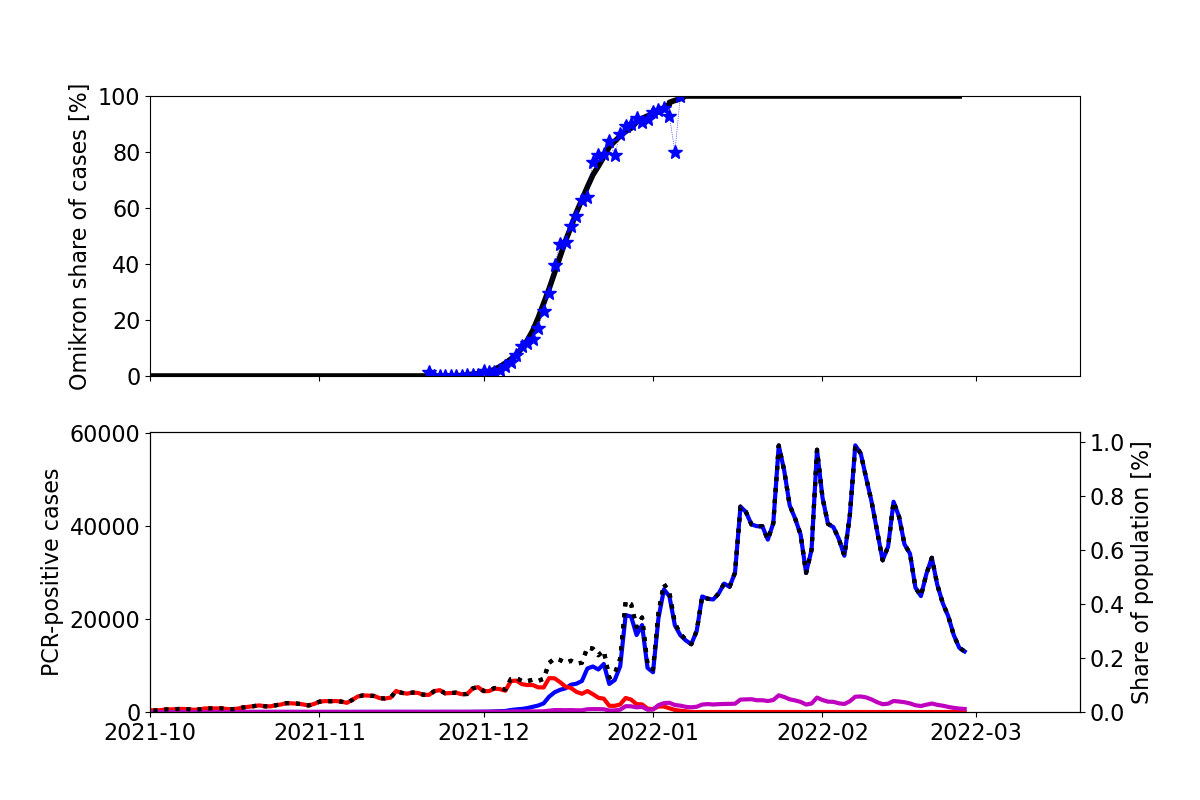

In [43]:
fig,(ax2,ax1) = plt.subplots(2,1,sharex=True)
ax2.plot(oDay,100*oRate,'k',linewidth=4,label='Ratio of Omikron-cases (running mean)')
# ax2.plot(rnTime(oDay,7),rnMean(oRate,7))
ax2.plot(dfOmikron.Dato,dfOmikron.Ratio,'b*:',linewidth=0.5,label='Daily ratio (data)')

ax1_1 = ax1.twinx()
DKpop = 5800000
ax1_1.plot(dfTot.index,100*dfTot.infected/DKpop,'k:')
ax1.plot(dfTot.index,dfTot.infected,'k:',label='Total cases')
ax1.plot(dfTot.index,dfTot.infected*oRate,'b',label='Omikron cases')
ax1.plot(dfTot.index,dfTot.infected*(1-oRate),'r',label='Delta cases')
ax1.plot(dfRe.index,dfRe.infected,'m',label='Reinfections')


ax1.set_ylim(bottom=0)
ax1_1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=100)


ax2.set_ylabel('Omikron share of cases [%]')
ax1.set_ylabel('PCR-positive cases')
ax1_1.set_ylabel('Share of population [%]')

ax1.set_xlim(left=np.datetime64('2021-10'))

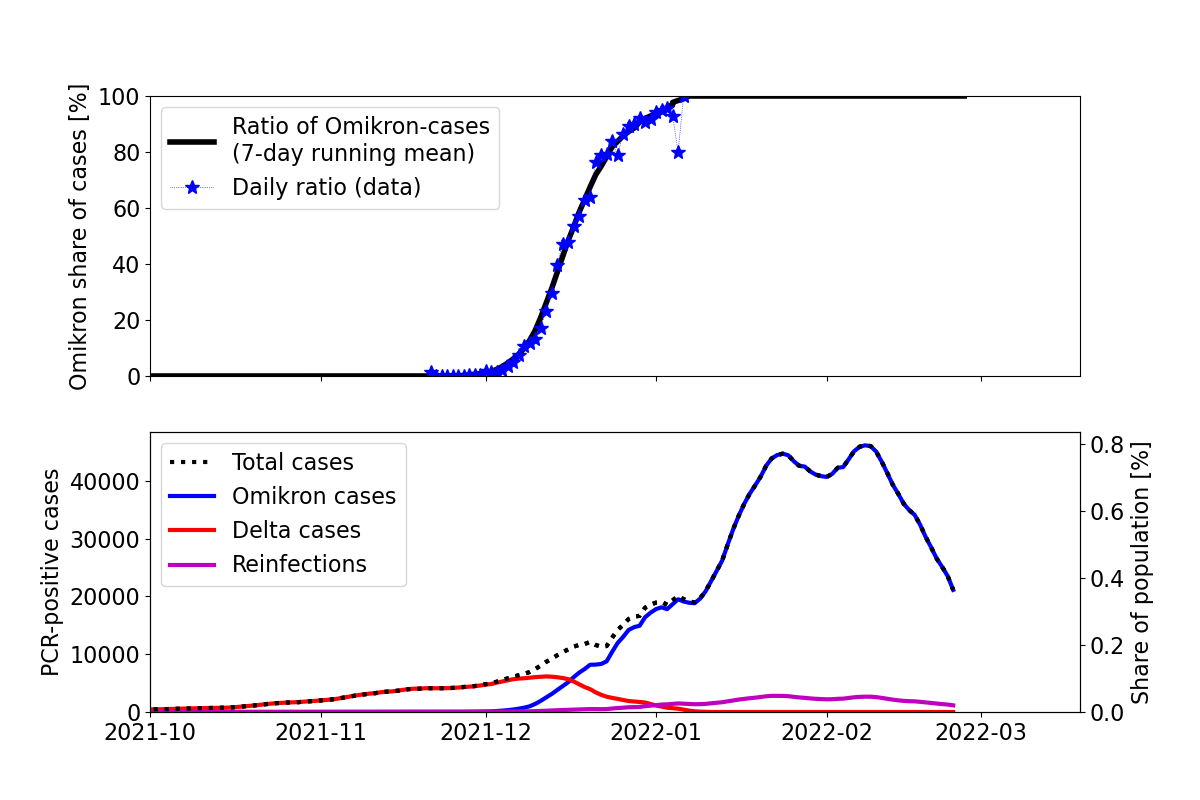

In [44]:
fig,(ax2,ax1) = plt.subplots(2,1,sharex=True)
ax2.plot(oDay,100*oRate,'k',linewidth=4,label='Ratio of Omikron-cases\n(7-day running mean)')
# ax2.plot(rnTime(oDay,7),rnMean(oRate,7))
ax2.plot(dfOmikron.Dato,dfOmikron.Ratio,'b*:',linewidth=0.5,label='Daily ratio (data)')

ax1_1 = ax1.twinx()
DKpop = 5800000
ax1_1.plot(rnTime(dfTot.index,7),rnMean(100*dfTot.infected/DKpop,7),'k:')
ax1.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected,7),'k:',label='Total cases')
ax1.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected*oRate,7),'b',label='Omikron cases')
ax1.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected*(1-oRate),7),'r',label='Delta cases')
ax1.plot(rnTime(dfRe.index,7),rnMean(dfRe.infected,7),'m',label='Reinfections')


ax1.set_ylim(bottom=0)
ax1_1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=100)

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

ax2.set_ylabel('Omikron share of cases [%]')
ax1.set_ylabel('PCR-positive cases')
ax1_1.set_ylabel('Share of population [%]')

ax1.set_xlim(left=np.datetime64('2021-10'))

if saveFigures:
    fig.savefig('Figures/OmikronOverview')

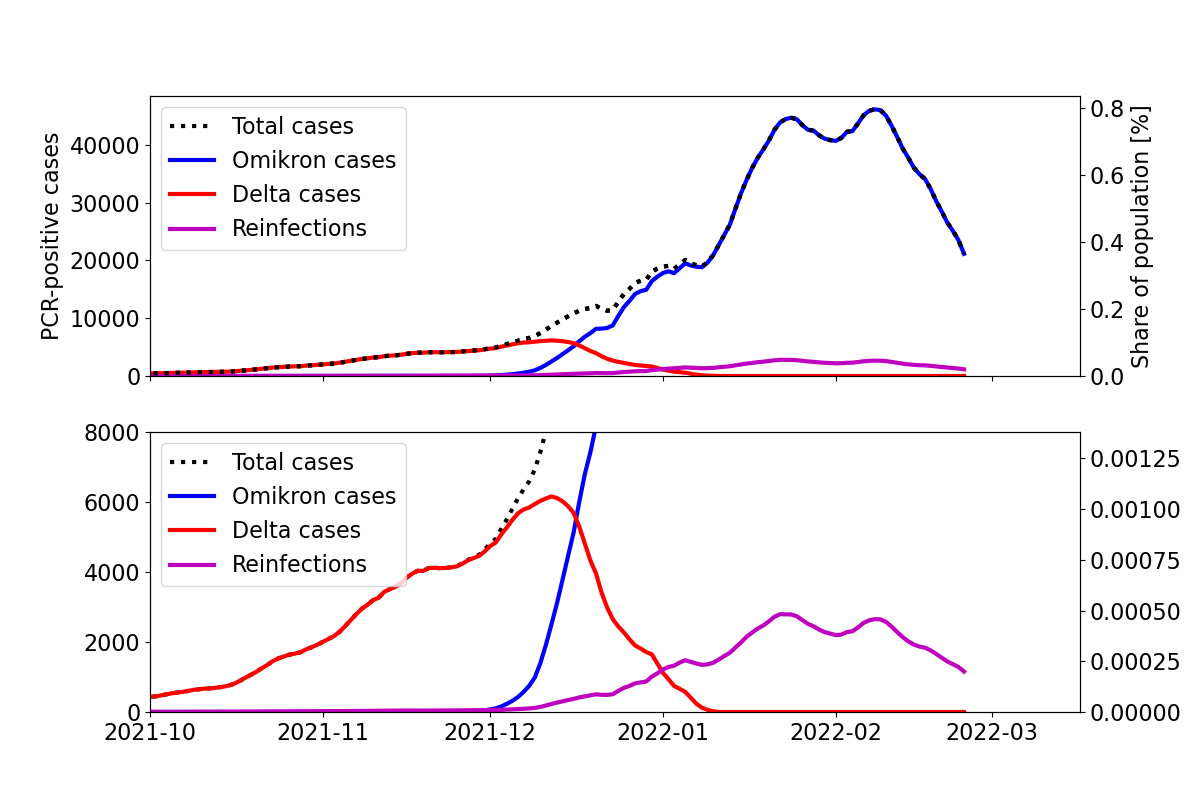

In [45]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
# ax2.plot(oDay,100*oRate,'k',linewidth=4,label='Ratio of Omikron-cases\n(7-day running mean)')
# # ax2.plot(rnTime(oDay,7),rnMean(oRate,7))
# ax2.plot(dfOmikron.Dato,dfOmikron.Ratio,'b*:',linewidth=0.5,label='Daily ratio (data)')

ax1_1 = ax1.twinx()
DKpop = 5800000
ax1_1.plot(rnTime(dfTot.index,7),rnMean(100*dfTot.infected/DKpop,7),'k:')
ax1.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected,7),'k:',label='Total cases')
ax1.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected*oRate,7),'b',label='Omikron cases')
ax1.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected*(1-oRate),7),'r',label='Delta cases')
ax1.plot(rnTime(dfRe.index,7),rnMean(dfRe.infected,7),'m',label='Reinfections')

ax2_1 = ax2.twinx()
DKpop = 5800000
ax2_1.plot(rnTime(dfTot.index,7),rnMean(100*dfTot.infected/DKpop,7),'k:')
ax2.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected,7),'k:',label='Total cases')
ax2.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected*oRate,7),'b',label='Omikron cases')
ax2.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected*(1-oRate),7),'r',label='Delta cases')
ax2.plot(rnTime(dfRe.index,7),rnMean(dfRe.infected,7),'m',label='Reinfections')


ax1.set_ylim(bottom=0)
ax1_1.set_ylim(bottom=0)

ax2.set_ylim(bottom=0,top=8000)
ax2_1.set_ylim(bottom=0,top=8000/DKpop)
# ax2.set_ylim(bottom=0,top=100)

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

# ax2.set_ylabel('Omikron share of cases [%]')
ax1.set_ylabel('PCR-positive cases')
ax1_1.set_ylabel('Share of population [%]')

ax1.set_xlim(left=np.datetime64('2021-10'))

if saveFigures:
    fig.savefig('Figures/OmikronOverview2')

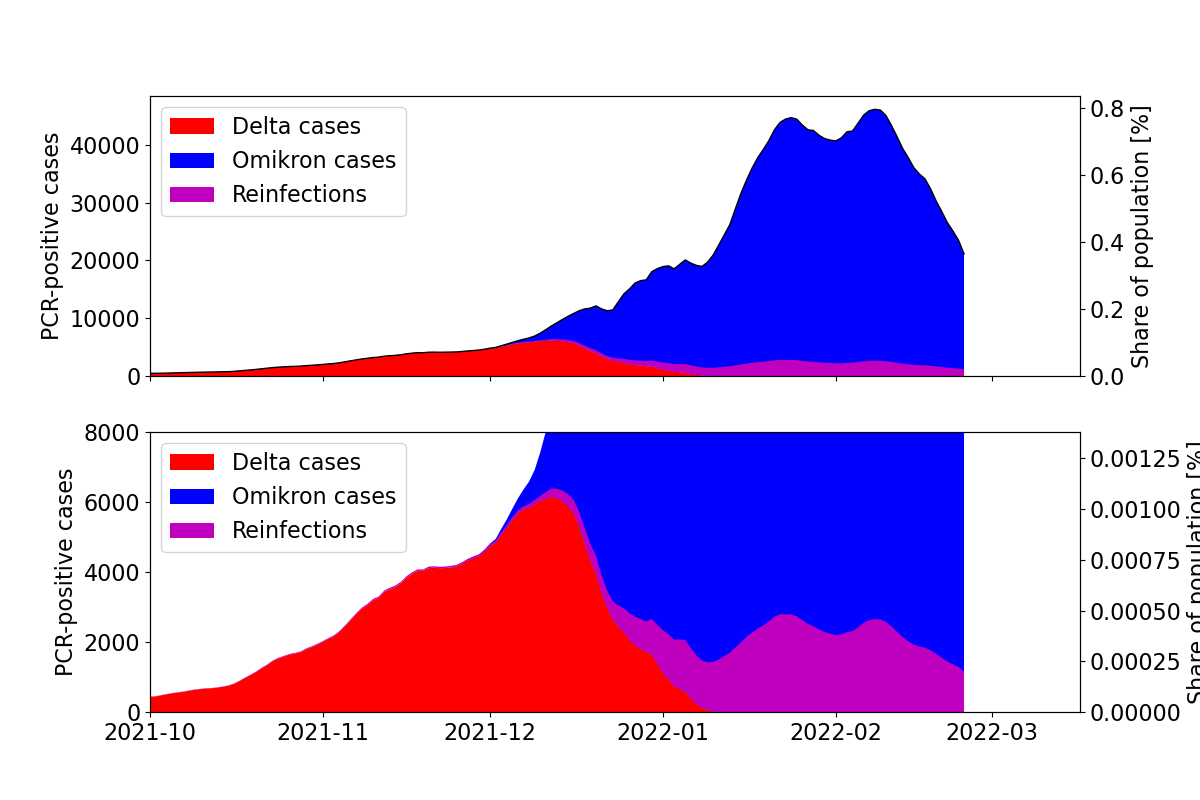

In [46]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

ax1_1 = ax1.twinx()
DKpop = 5800000
ax1_1.plot(rnTime(dfTot.index,7),rnMean(100*dfTot.infected/DKpop,7),'k',linewidth=1)
# ax1.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected,7),'k:',label='Total cases')
ax1.fill_between(rnTime(dfTot.index,7),rnMean(dfTot.infected*(1-oRate),7),linewidth=0,color='r',label='Delta cases')
ax1.fill_between(rnTime(dfTot.index,7),rnMean(dfTot.infected,7),rnMean(dfTot.infected*(1-oRate),7),linewidth=0,color='b',label='Omikron cases')
ax1.fill_between(rnTime(dfRe.index,7),rnMean(dfTot.infected*(1-oRate),7)+rnMean(dfRe.infected,7),rnMean(dfTot.infected*(1-oRate),7),linewidth=0,color='m',label='Reinfections')


ax2_1 = ax2.twinx()
DKpop = 5800000
ax2_1.plot(rnTime(dfTot.index,7),rnMean(100*dfTot.infected/DKpop,7),'k',linewidth=1)
# ax2.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected,7),'k:',label='Total cases')
ax2.fill_between(rnTime(dfTot.index,7),rnMean(dfTot.infected*(1-oRate),7),linewidth=0,color='r',label='Delta cases')
ax2.fill_between(rnTime(dfTot.index,7),rnMean(dfTot.infected,7),rnMean(dfTot.infected*(1-oRate),7),linewidth=0,color='b',label='Omikron cases')
ax2.fill_between(rnTime(dfRe.index,7),rnMean(dfTot.infected*(1-oRate),7)+rnMean(dfRe.infected,7),rnMean(dfTot.infected*(1-oRate),7),linewidth=0,color='m',label='Reinfections')


ax1.set_ylim(bottom=0)
ax1_1.set_ylim(bottom=0)

ax2.set_ylim(bottom=0,top=8000)
ax2_1.set_ylim(bottom=0,top=8000/DKpop)
# ax2.set_ylim(bottom=0,top=100)

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

# ax2.set_ylabel('Omikron share of cases [%]')
ax1.set_ylabel('PCR-positive cases')
ax1_1.set_ylabel('Share of population [%]')
ax2.set_ylabel('PCR-positive cases')
ax2_1.set_ylabel('Share of population [%]')

ax1.set_xlim(left=np.datetime64('2021-10'))

if saveFigures:
    fig.savefig('Figures/OmikronOverview3')

In [47]:
# Collect main numbers for export
dfToSave = pd.DataFrame() 
dfToSave['Date'] = dfTot.index 
dfToSave['Total'] = (dfTot.infected ).values
dfToSave['Delta'] = (dfTot.infected*(1-oRate)).values
dfToSave['Omikron'] = (dfTot.infected*oRate).values
dfToSave['Reinfections'] = (dfRe.infected  ).values


dfToSave.to_csv('OmikronDeltaData.csv',index=False)

In [48]:
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
# # ax2.plot(oDay,100*oRate,'k',linewidth=4,label='Ratio of Omikron-cases\n(7-day running mean)')
# # # ax2.plot(rnTime(oDay,7),rnMean(oRate,7))
# # ax2.plot(dfOmikron.Dato,dfOmikron.Ratio,'b*:',linewidth=0.5,label='Daily ratio (data)')

# ax1_1 = ax1.twinx()
# DKpop = 5800000
# ax1_1.plot(rnTime(dfTot.index,7),rnMean(100*dfTot.infected/DKpop,7),'k:')
# ax1.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected,7),'k:',label='Total cases')
# ax1.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected*oRate,7),'b',label='Omikron cases')
# ax1.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected*(1-oRate),7),'r',label='Delta cases')
# ax1.plot(rnTime(dfRe.index,7),rnMean(dfRe.infected,7),'m',label='Reinfections')

# # ax2_1 = ax2.twinx()
# # DKpop = 5800000
# # ax2_1.plot(rnTime(dfTot.index,7),rnMean(100*dfTot.infected/DKpop,7),'k:')
# # ax2.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected,7),'k:',label='Total cases')
# # ax2.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected*oRate,7),'b',label='Omikron cases')
# # ax2.plot(rnTime(dfTot.index,7),rnMean(dfTot.infected*(1-oRate),7),'r',label='Delta cases')
# # ax2.plot(rnTime(dfRe.index,7),rnMean(dfRe.infected,7),'m',label='Reinfections')


# # ax1.set_ylim(bottom=0)
# # ax1_1.set_ylim(bottom=0)

# # ax2.set_ylim(bottom=0,top=8000)
# # ax2_1.set_ylim(bottom=0,top=8000/DKpop)
# # # ax2.set_ylim(bottom=0,top=100)

# # ax1.legend(loc='upper left')
# # ax2.legend(loc='upper left')

# # # ax2.set_ylabel('Omikron share of cases [%]')
# # ax1.set_ylabel('PCR-positive cases')
# # ax1_1.set_ylabel('Share of population [%]')

# # ax1.set_xlim(left=np.datetime64('2021-10'))

# # if saveFigures:
# #     fig.savefig('Figures/OmikronOverview3')